In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
%matplotlib inline
     

In [2]:
import pandas as pd

df = pd.read_csv("IMDb Movies India.csv", encoding='latin-1')


In [3]:
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [5]:
df.drop_duplicates(inplace=True)
     


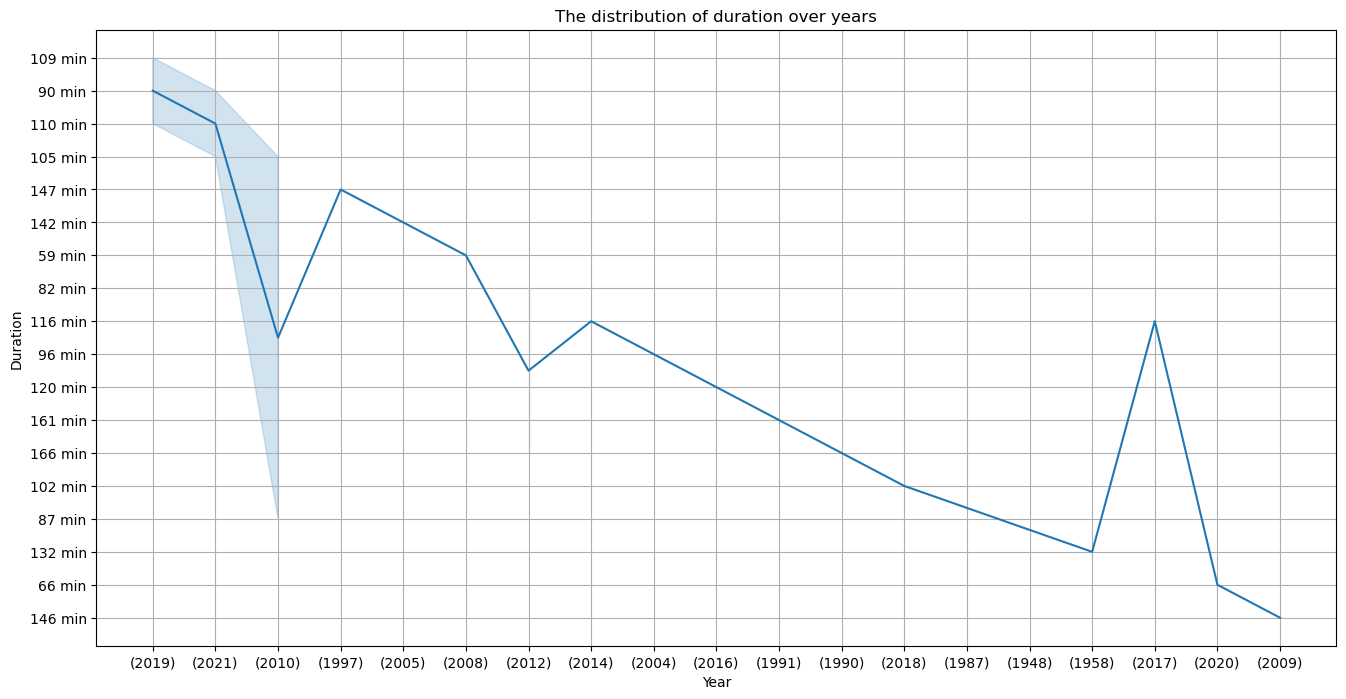

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.lineplot(data=df.head(30), x='Year', y='Duration')
plt.title('The distribution of duration over years')
plt.xlabel('Year')        # Optional, but improves readability
plt.ylabel('Duration')    # Optional
plt.grid(True)            # Optional for better visual interpretation
plt.show()


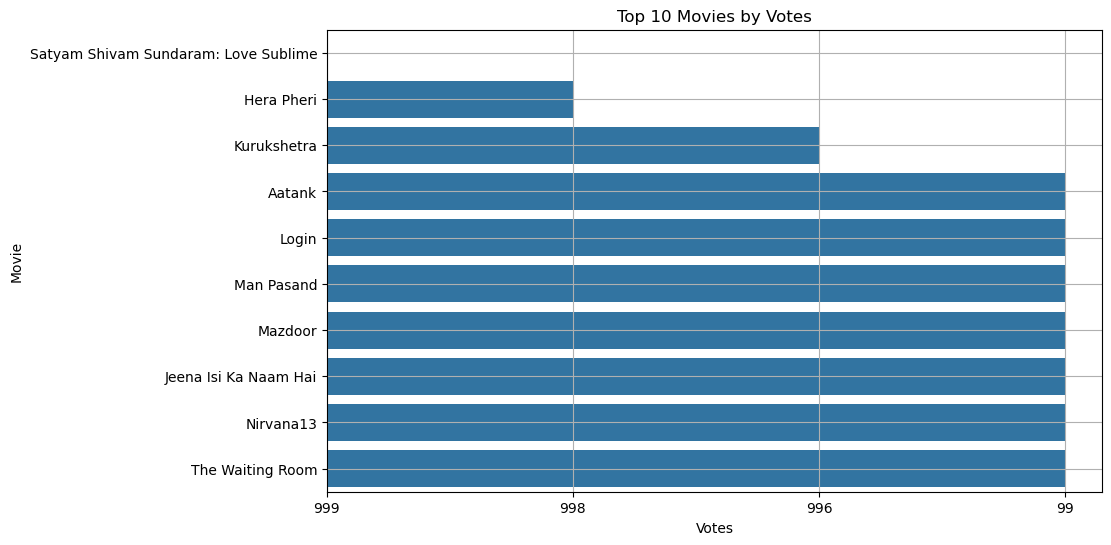

In [8]:
top_movies_votes = df.sort_values(by='Votes', ascending=False).dropna(subset=['Votes']).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies_votes['Votes'], y=top_movies_votes['Name'], orient='h')
plt.title('Top 10 Movies by Votes')
plt.xlabel('Votes')
plt.ylabel('Movie')
plt.grid(True)
plt.show()

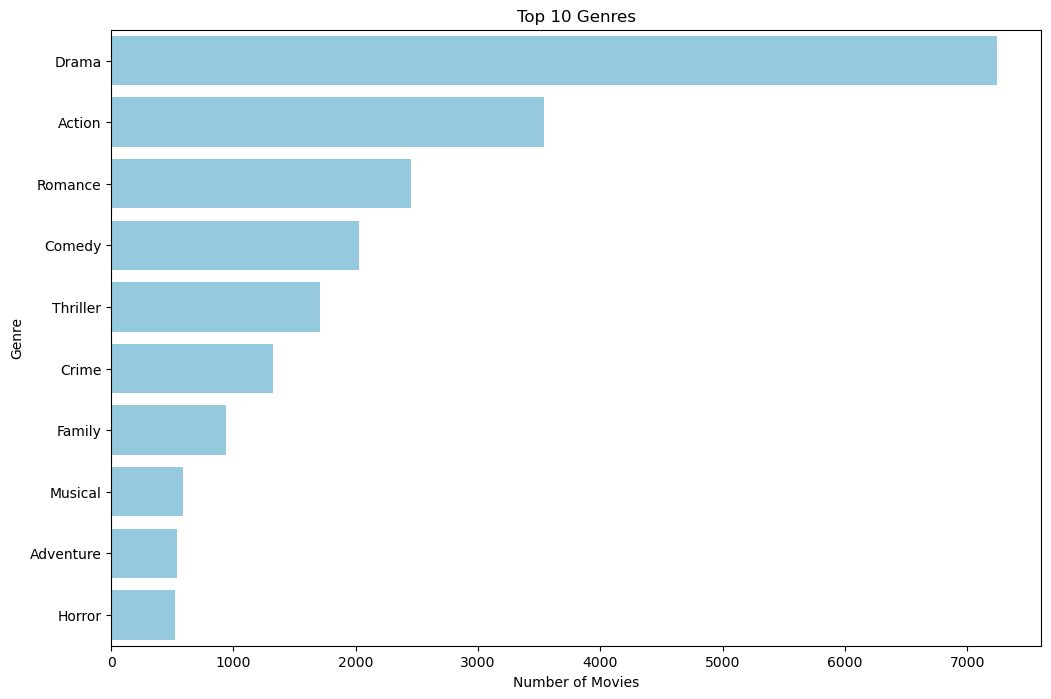

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Homecoming,(2021),90 min,Musical,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,#Yaaram,(2019),110 min,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [9]:
df['Genre'] = df['Genre'].str.split(', ')
genrevalues= df.explode('Genre').reset_index(drop=True)
top= genrevalues['Genre'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top.index, x=top.values,color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()
genrevalues.head()

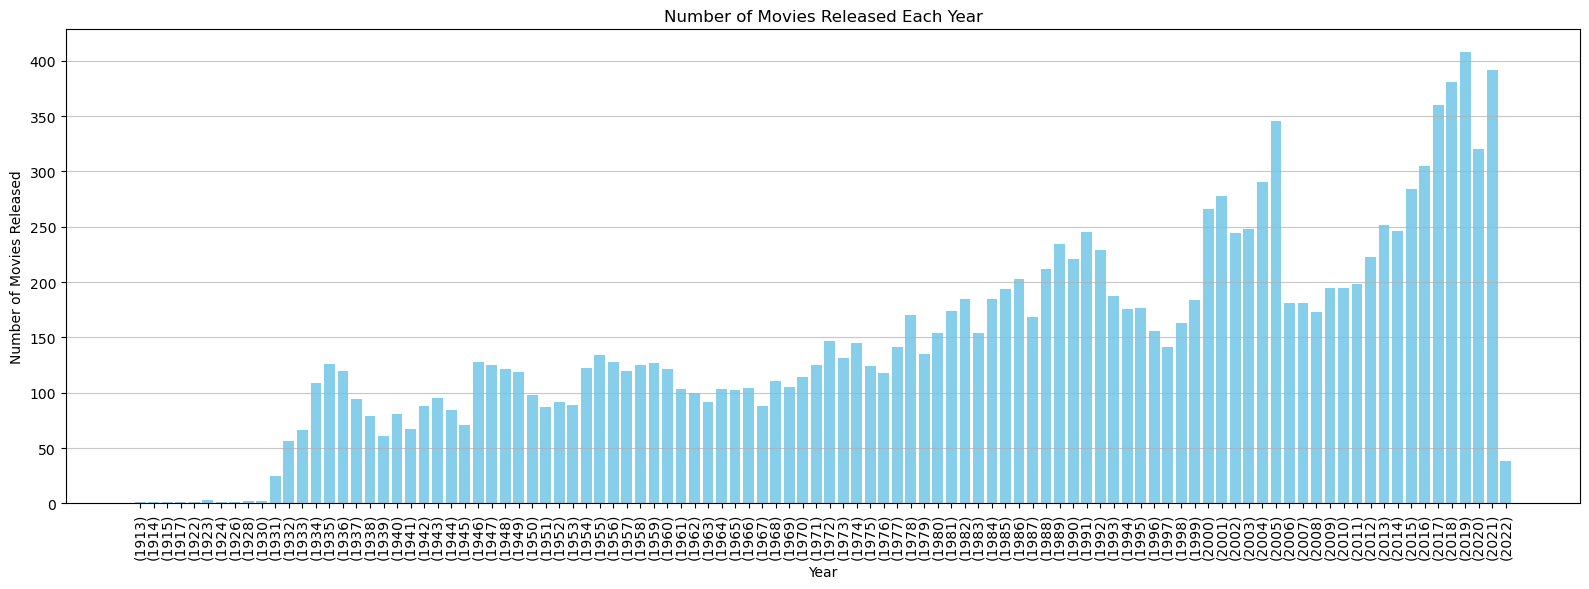

In [10]:
movies_per_year = df['Year'].value_counts().sort_index()

colors = ['skyblue']
plt.figure(figsize=(16, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

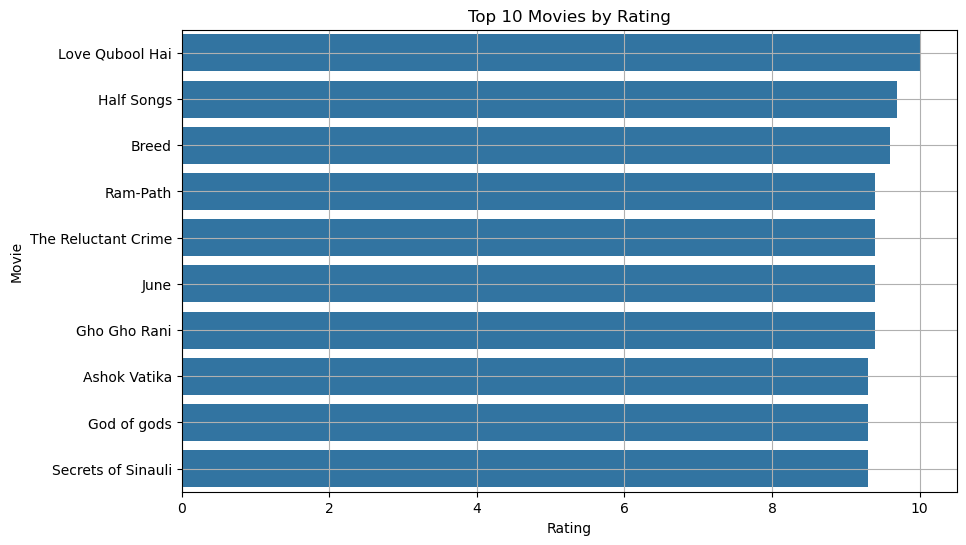

In [11]:
top_movies_rating = df.sort_values(by='Rating', ascending=False).dropna(subset=['Rating']).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies_rating['Rating'], y=top_movies_rating['Name'], orient='h')
plt.title('Top 10 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.grid(True)
plt.show()
     


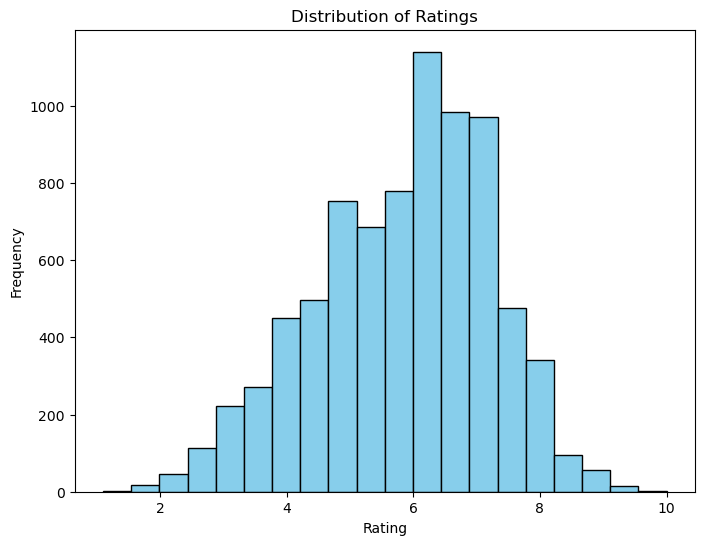

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

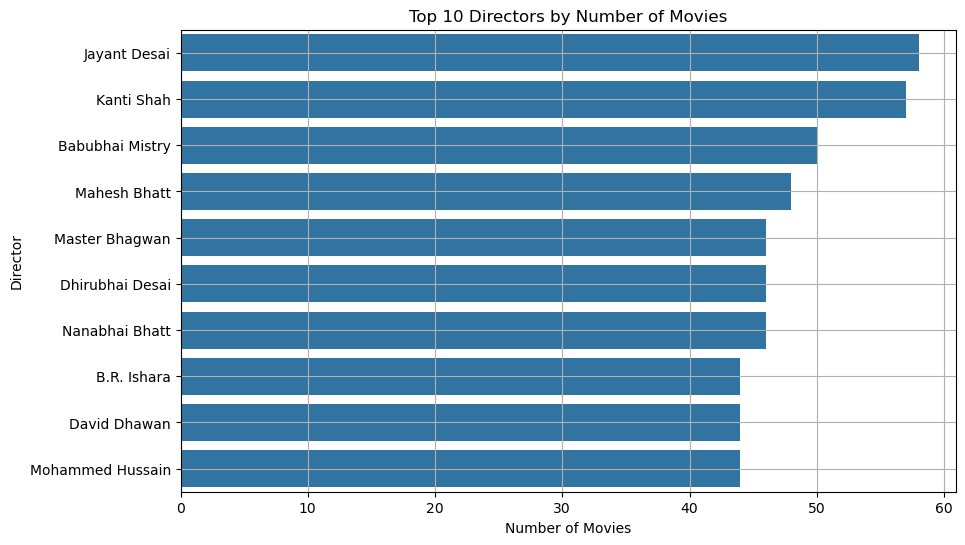

In [13]:
top_directors = df['Director'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, orient='h')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.grid(True)
plt.show()

<Axes: >

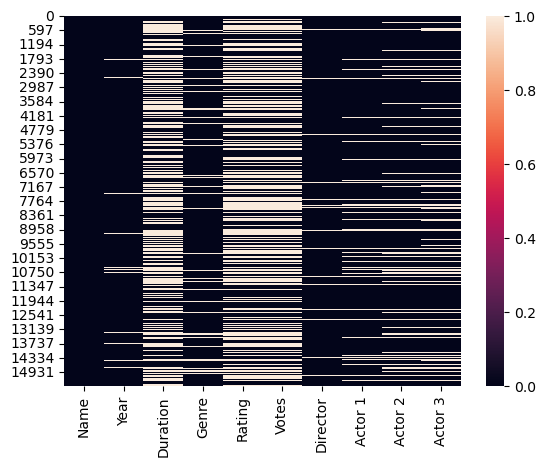

In [14]:
sns.heatmap(df.isnull())

In [15]:
df['Name'].value_counts
     

<bound method IndexOpsMixin.value_counts of 0                                          
1        #Gadhvi (He thought he was Gandhi)
2                               #Homecoming
3                                   #Yaaram
4                         ...And Once Again
                        ...                
15504                   Zulm Ko Jala Doonga
15505                                 Zulmi
15506                             Zulmi Raj
15507                         Zulmi Shikari
15508                          Zulm-O-Sitam
Name: Name, Length: 15503, dtype: object>

In [16]:
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)

In [18]:

df['Rating'].isnull().sum()

7584

In [20]:
df['Rating'] = df['Rating'].fillna(value=x)


In [21]:
df['Votes'] = df['Votes'].replace("$5.16M", 516)
df['Votes'] = df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',', '').astype('float64')
     

In [23]:
df['Votes'] = df['Votes'].fillna(value=x)

In [24]:
df['Year'].isnull().any()
df['Year'] = df['Year'].str.strip('()').astype('float64')
     

In [25]:
df.shape

(15503, 10)

In [26]:
df.dropna(subset=['Year','Genre','Director','Actor 1','Actor 2','Actor 3'], inplace=True)

In [27]:
df.shape

(11085, 10)

<Axes: >

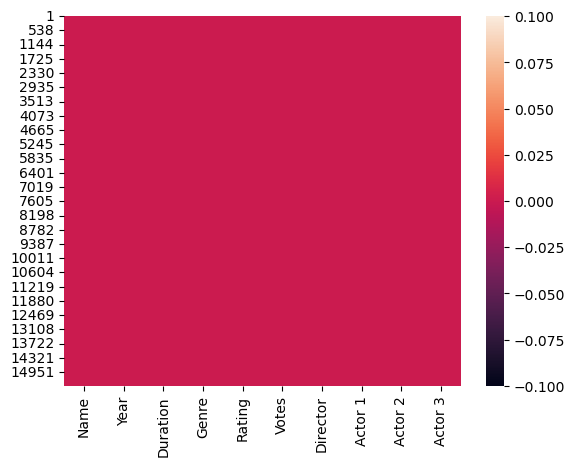

In [28]:
sns.heatmap(df.isnull())

In [29]:
df['Genre']=df['Genre'].apply(tuple)
df['Genre']=df.groupby('Genre')['Rating'].transform('mean')
df['Name']=df.groupby('Name')['Rating'].transform('mean')
df['Director']=df.groupby('Director')['Rating'].transform('mean')
df['Actor 1']=df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor 2']=df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor 3']=df.groupby('Actor 3')['Rating'].transform('mean')


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11085 non-null  float64
 1   Year      11085 non-null  float64
 2   Duration  11085 non-null  float64
 3   Genre     11085 non-null  float64
 4   Rating    11085 non-null  float64
 5   Votes     11085 non-null  float64
 6   Director  11085 non-null  float64
 7   Actor 1   11085 non-null  float64
 8   Actor 2   11085 non-null  float64
 9   Actor 3   11085 non-null  float64
dtypes: float64(10)
memory usage: 952.6 KB


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Assuming df is already defined
X1 = df.drop(columns='Rating', axis=1)
Y1 = df['Rating']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=27)
mutual_info = mutual_info_regression(X1_train, Y1_train)
mutual_info = pd.Series(mutual_info)


[Text(0, 0, '2.65404'),
 Text(0, 0, '0.909483'),
 Text(0, 0, '0.861118'),
 Text(0, 0, '0.846603'),
 Text(0, 0, '0.832581'),
 Text(0, 0, '0.576878'),
 Text(0, 0, '0.208193'),
 Text(0, 0, '0.131732'),
 Text(0, 0, '0.115385')]

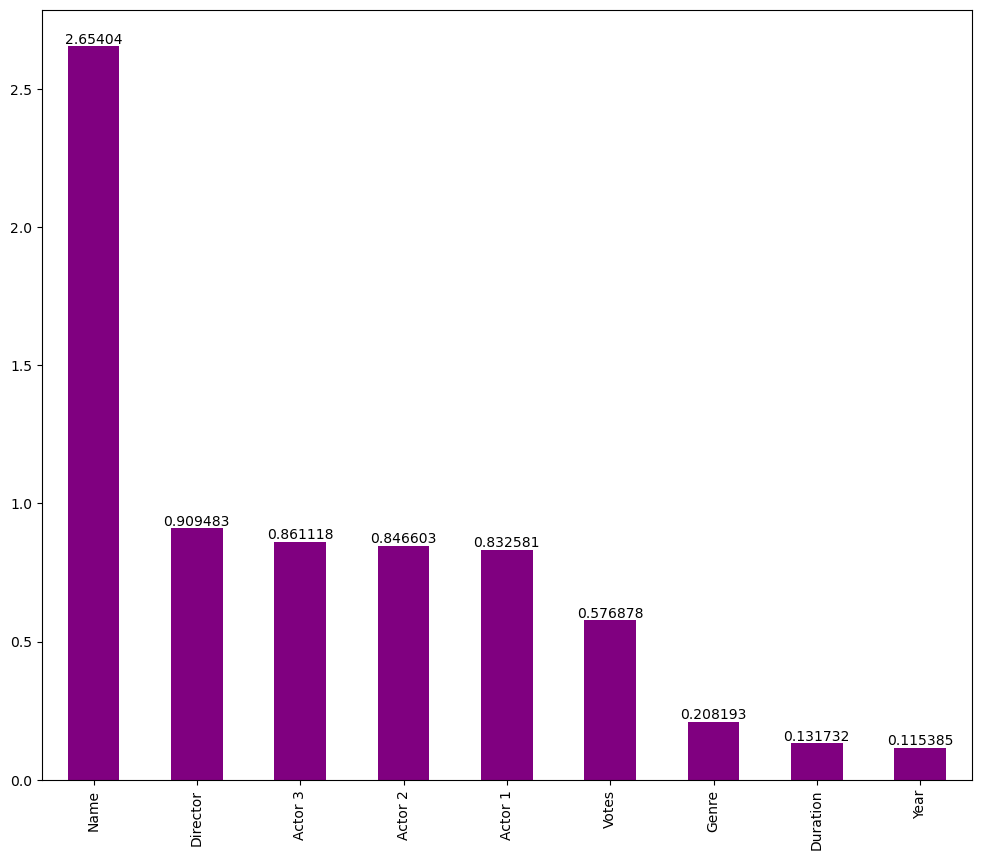

In [33]:
#SELECT KBEST FEATURES METHOD
X1=df.drop(columns='Rating',axis=1)
Y1=df['Rating']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3,random_state=27)
mutual_info=mutual_info_regression(X1_train,Y1_train)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X1_train.columns
bar1=mutual_info.sort_values(ascending=False).plot.bar(figsize=(12,10),color='purple')
bar1.bar_label(bar1.containers[0])


In [34]:
from sklearn.feature_selection import SelectKBest
cols=SelectKBest(mutual_info_regression,k=4)
cols.fit(X1_train,Y1_train)
X1_train.columns[cols.get_support()]

Index(['Name', 'Director', 'Actor 2', 'Actor 3'], dtype='object')

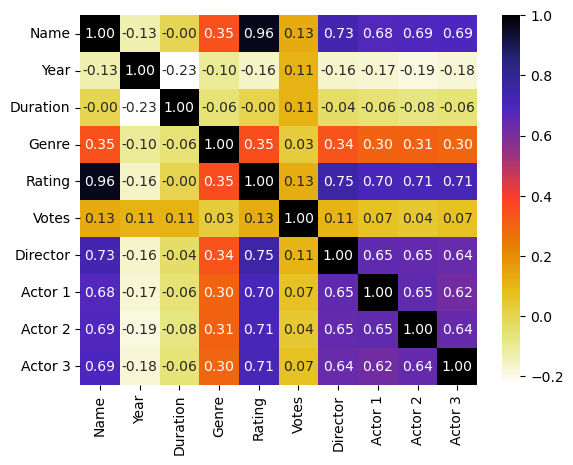

In [35]:
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r, fmt='.2f')
plt.show()
     

In [36]:
x=df.drop(columns=['Duration','Rating'],axis=1)
y=df['Rating']
     